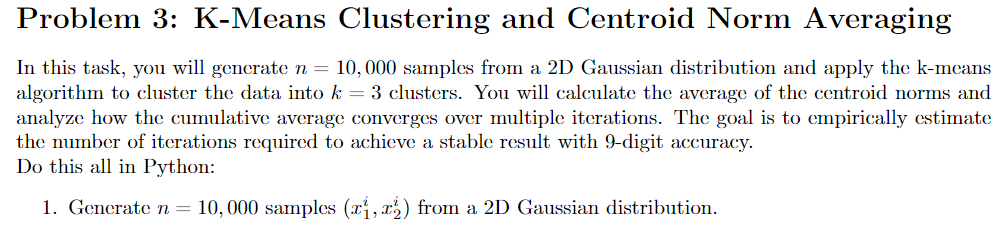
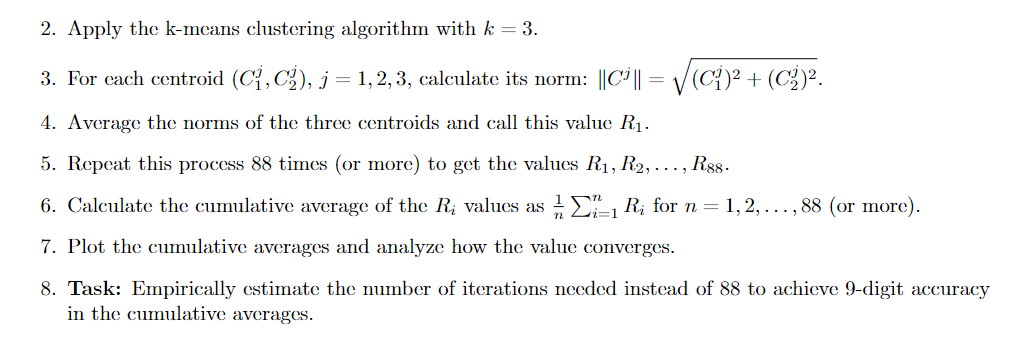

In [70]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

Step 1: Generate n = 10,000 samples from a 2D Gaussian distribution

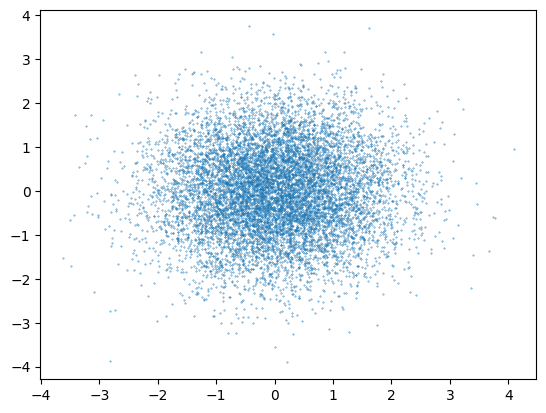

In [71]:
n_samples = 10000
mean = [0, 0]
# Identity matrix for independent variables
cov = [[1, 0], 
       [0, 1]]  

samples = np.random.multivariate_normal(mean, cov, n_samples)

plt.scatter(samples[:, 0], samples[:, 1], s=0.1)
plt.show()

Step 2: Apply k-means clustering

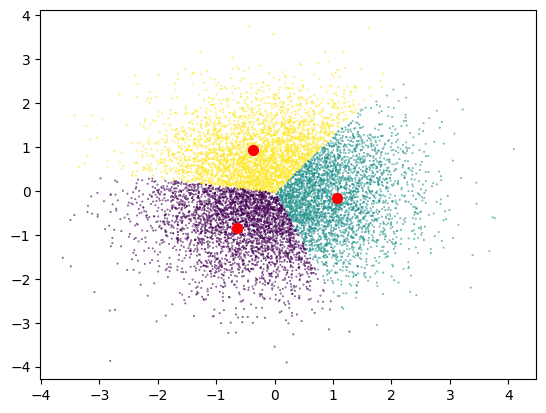

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)
centroids = kmeans.cluster_centers_


plt.scatter(samples[:, 0], samples[:, 1], c=kmeans.labels_, s=0.1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()



Step 3: For each centroid calculate its norm

In [73]:
norms =[(centroid[0]**2 + centroid[1]**2)**0.5 for centroid in centroids]
norms


[1.0618844319588157, 1.0725146752032106, 1.0079131817781104]

Step 4: Average the norms of the three centroids and call it R1

In [74]:
R1 = np.mean(norms)
R1

1.0474374296467122

Step 5: Repeat steps 1-4 more times

In [75]:
repetitions = 88

R_i = []

for _ in range(repetitions+1):
    samples = np.random.multivariate_normal(mean, cov, n_samples)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(samples)
    
    centroids = kmeans.cluster_centers_
    norms = [(centroid[0]**2 + centroid[1]**2)**0.5 for centroid in centroids]

    R_i.append(np.mean(norms))


Step 6: Calculate the cumulative average

In [76]:
cumulative_averages = [np.mean(R_i[:n]) for n in range(1, repetitions+1)]

Step 7: Plot the cumulative averages

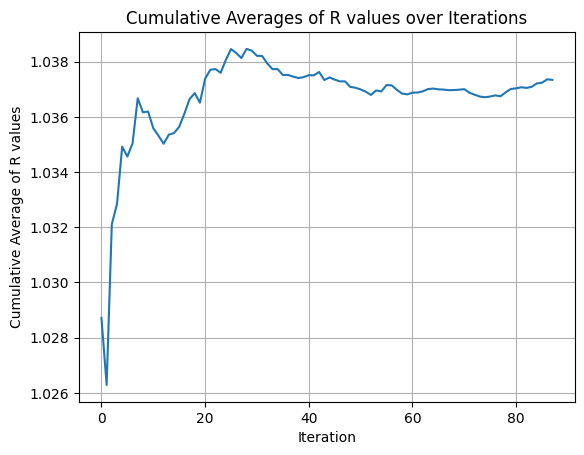

In [77]:
plt.plot(cumulative_averages)
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average of R values')
plt.title('Cumulative Averages of R values over Iterations')
plt.grid(True)
plt.show()

Step 8: Estimate the number of iterations for 9-digit accuracy

In [78]:
acc = 1e-9

R_i = []
cumulative_averages = []

while True:
    samples = np.random.multivariate_normal(mean, cov, n_samples)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(samples)
    
    centroids = kmeans.cluster_centers_
    norms = [(centroid[0]**2 + centroid[1]**2)**0.5 for centroid in centroids]

    R_i.append(np.mean(norms))
    
    cumulative_averages.append(np.mean(R_i))
    # print(cumulative_averages[-1])

    if len(cumulative_averages) >= 2:
        if abs(cumulative_averages[-1] - cumulative_averages[-2]) < acc:
            print(f'Number of iterations needed for 9-digit accuracy: {len(cumulative_averages)} iterations')
            print(f'Final R value: {cumulative_averages[-1]}')
            print(f"Difference between last two iterations: {abs(cumulative_averages[-1] - cumulative_averages[-2]):.10f}")
            break

Number of iterations needed for 9-digit accuracy: 3181 iterations
Final R value: 1.0377399460096413
Difference between last two iterations: 0.0000000003


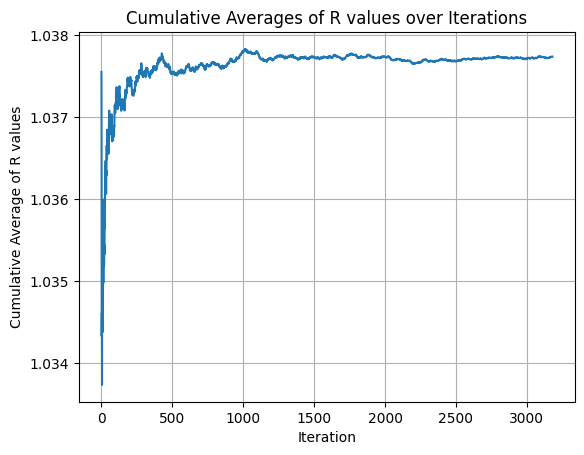

In [79]:
plt.plot(cumulative_averages)
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average of R values')
plt.title('Cumulative Averages of R values over Iterations')
plt.grid(True)
plt.show()